In [9]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = "/mnt/e/aiffel/dlton/dlthon/data_no_aug/Train_Test_Valid"

# 이미지 크기 및 배치 크기 설정
img_size = (224, 224)
batch_size = 32

# 하위 폴더 탐색하여 데이터셋 생성
datasets = {}
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        dataset_name = f"{folder.lower()}_ds"
        datasets[dataset_name] = tf.keras.utils.image_dataset_from_directory(
            folder_path,
            image_size=img_size,
            batch_size=batch_size,
            label_mode='categorical'
        )
        print(f"## Dataset: {dataset_name}, Size: {len(datasets[dataset_name]) * batch_size}")

Found 40 files belonging to 6 classes.
## Dataset: test_ds, Size: 64
Found 319 files belonging to 6 classes.
## Dataset: train_ds, Size: 320
Found 39 files belonging to 6 classes.
## Dataset: valid_ds, Size: 64


In [11]:
# 코드 8-1 간단한 컨브넷
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [12]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_jellyfish_data_no_aug_cnn_8_1.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30


10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2032 - loss: 30.4496 - val_accuracy: 0.1795 - val_loss: 1.8308
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1806 - loss: 1.8058 - val_accuracy: 0.2051 - val_loss: 1.7321
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.2698 - loss: 1.6592 - val_accuracy: 0.3333 - val_loss: 1.4396
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4003 - loss: 1.4391 - val_accuracy: 0.4103 - val_loss: 1.4832
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4691 - loss: 1.3283 - val_accuracy: 0.4103 - val_loss: 1.3468
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5767 - loss: 1.1598 - val_accuracy: 0.4615 - val_loss: 1.6127
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5411 - loss: 1.1096 - val_accuracy: 0.4615 - val_loss: 1.4221
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5412 - loss: 1.0429 - val_accuracy: 0.5128 - val_loss: 1.8956
Ep

In [13]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,396,308 (12.96 MB)

 Trainable params: 1,132,102 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,264,206 (8.64 MB)

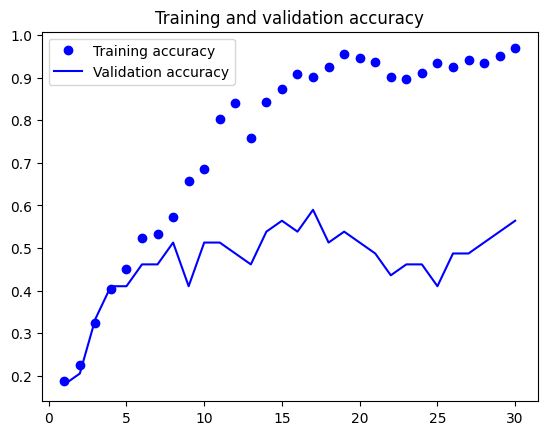

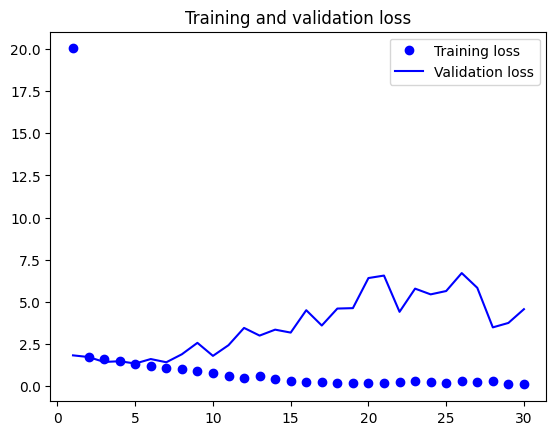

In [14]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [15]:
# 저장된 모델 로드 후 평가
best_model = tf.keras.models.load_model(model_filename)
# scores = best_model.evaluate(datasets['test_ds'])
# print(f"Test Accuracy: {scores[1] * 100:.2f}%")
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.3854 - loss: 1.3456
Test Accuracy: 37.50%
Test Loss: 136.89%


 ## 코드 8-7 소규모 컨브넷 ##

In [18]:
# 코드 8-7 소규모 컨브넷
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Rescaling(1./255)(inputs)    
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [19]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_jellyfish_data_no_aug_cnn_8_7.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30


10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.1774 - loss: 1.8133 - val_accuracy: 0.4103 - val_loss: 1.6602
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2958 - loss: 1.6479 - val_accuracy: 0.3590 - val_loss: 1.5794
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2938 - loss: 1.6173 - val_accuracy: 0.3846 - val_loss: 1.3797
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.4217 - loss: 1.3424 - val_accuracy: 0.4103 - val_loss: 1.3872
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.3721 - loss: 1.3423 - val_accuracy: 0.4872 - val_loss: 1.3157
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5298 - loss: 1.1915 - val_accuracy: 0.5128 - val_loss: 1.1941
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5035 - loss: 1.1394 - val_accuracy: 0.4872 - val_loss: 1.2299
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6454 - loss: 0.9610 - val_accuracy: 0.4615 - val_loss: 1.2660
Epo

In [20]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,396,308 (12.96 MB)

 Trainable params: 1,132,102 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,264,206 (8.64 MB)

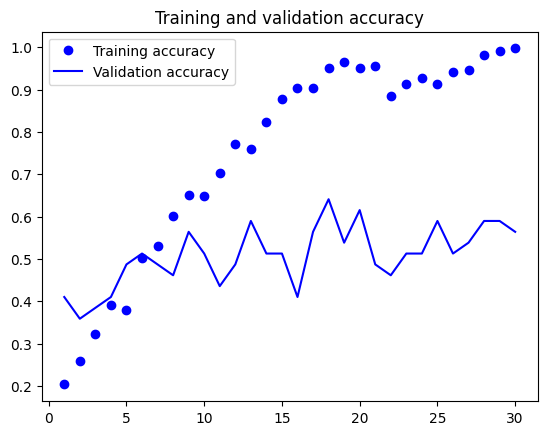

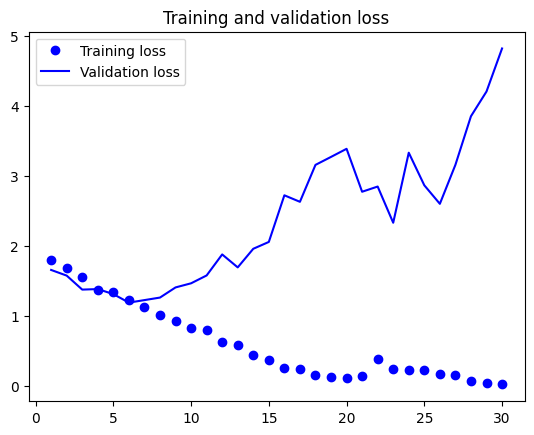

In [21]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
# 저장된 모델 로드 후 평가
best_model = tf.keras.models.load_model(model_filename)
# scores = best_model.evaluate(datasets['test_ds'])
# print(f"Test Accuracy: {scores[1] * 100:.2f}%")
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.5646 - loss: 1.2408
Test Accuracy: 55.00%
Test Loss: 124.01%
